In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('pyspark example1').getOrCreate() #chaining

# RDD에서 다룰 수 있는 데이터 타입 TypeSa
1. 비정형 데이터 - .... json, txt, str
2. 정형 데이터 - 리스트, csv, table

In [2]:
#RDD[str]
rdd1 = spark.sparkContext.textFile('learning_spark_data/log.txt')
rdd1

learning_spark_data/log.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [3]:
rdd1.take(3)

['2025-07-31 10:00:01 INFO User=kim ACTION=LOGIN RESULT=SUCCESS',
 '2025-07-31 10:05:43 WARN User=lee ACTION=DOWNLOAD RESULT=FAIL',
 '2025-07-31 10:08:22 INFO User=park ACTION=UPLOAD RESULT=SUCCESS']

In [7]:
spark.stop()

In [ ]:
#RDD[dict] - data.json

In [4]:
import json
rdd2 = spark.sparkContext.textFile('learning_spark_data/data.json').map(json.loads)
rdd2

PythonRDD[5] at RDD at PythonRDD.scala:53

In [5]:
rdd2.take(3)

[{'user': 'kim',
  'action': 'login',
  'result': 'success',
  'time': '2025-07-31 10:00:01'},
 {'user': 'lee',
  'action': 'download',
  'result': 'fail',
  'time': '2025-07-31 10:05:43'},
 {'user': 'park',
  'action': 'upload',
  'result': 'success',
  'time': '2025-07-31 10:08:22'}]

# RDD 의 데이터 읽기 패턴
1. RDD 생성 - type 지정 x   
2. 형식 변환 - map()   
3. take(n)

# 스파크컨텍스트 객체
1. SparkSession.getOrCreate() → 세션객체로부터 사전에 설정된 변수에 맞춰 컨텍스트 생성
2. SparkConf + SparkContext → 저수준 연산에 적합한 방식

In [6]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster('local').setAppName('country-student-counts2')
conf

In [9]:
spark = SparkContext(conf = conf).getOrCreate()
spark.stop()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=country-student-counts2, master=local) created by __init__ at /tmp/ipykernel_21712/1936753039.py:1 

In [10]:
spark.getConf().getAll()

[('spark.master', 'local'),
 ('spark.driver.host', '1f27e566f506'),
 ('spark.app.id', 'local-1754026289376'),
 ('spark.app.submitTime', '1754024983249'),
 ('spark.driver.port', '35053'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.secu

In [11]:
spark.stop()

In [17]:
spark = SparkContext(conf = conf).getOrCreate()

In [18]:
import os
os.getcwd() #컨테이너 내부 경로

'/home/jovyan/work'

In [19]:
dir = os.path.join(os.getcwd(), 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

filename = 'xAPI-Edu-Data.csv'
filepath = os.path.join(dir, filename)
filepath

## 외부저장소에서 데이터를 로드, RDD 생성

In [21]:
lines = spark.textFile('file:///'+filepath.replace('\\','/'))
lines

file:////home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [22]:
lines.take(5)

['gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L']

In [23]:
lines.count() #대용량일 경우 문제가 됨. take(n)으로 미리보기!

481

# 데이터의 처리

In [24]:
header = lines.first()
header

'gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class'

In [25]:
datas = lines.filter(lambda row: row != header) #위 lines 와 다름
datas.take(3)

['M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L']

In [26]:
countries = datas.map(lambda row: row.split(',')[2])
countries

PythonRDD[6] at RDD at PythonRDD.scala:53

In [27]:
countries.take(3)

['KuwaIT', 'KuwaIT', 'KuwaIT']

In [28]:
result = countries.countByValue()
result

defaultdict(int,
            {'KuwaIT': 180,
             'lebanon': 19,
             'Egypt': 9,
             'SaudiArabia': 16,
             'USA': 16,
             'Jordan': 176,
             'venzuela': 1,
             'Iran': 6,
             'Tunis': 9,
             'Morocco': 4,
             'Syria': 6,
             'Iraq': 22,
             'Palestine': 10,
             'Lybia': 6})

In [29]:
result.items()

dict_items([('KuwaIT', 180), ('lebanon', 19), ('Egypt', 9), ('SaudiArabia', 16), ('USA', 16), ('Jordan', 176), ('venzuela', 1), ('Iran', 6), ('Tunis', 9), ('Morocco', 4), ('Syria', 6), ('Iraq', 22), ('Palestine', 10), ('Lybia', 6)])

In [30]:
# 집계
sorted(result.items(),key = lambda x: x[1], reverse=True) #파이썬문법

[('KuwaIT', 180),
 ('Jordan', 176),
 ('Iraq', 22),
 ('lebanon', 19),
 ('SaudiArabia', 16),
 ('USA', 16),
 ('Palestine', 10),
 ('Egypt', 9),
 ('Tunis', 9),
 ('Iran', 6),
 ('Syria', 6),
 ('Lybia', 6),
 ('Morocco', 4),
 ('venzuela', 1)]

In [32]:
sorted(result.items(),key = lambda x: x[1], reverse=True)[:3]

[('KuwaIT', 180), ('Jordan', 176), ('Iraq', 22)]

In [36]:
result.values()

dict_values([180, 19, 9, 16, 16, 176, 1, 6, 9, 4, 6, 22, 10, 6])

In [38]:
total_su = sum(result.values())
total_su

480

In [39]:
# 비율 계산
{k: round(v / total_su * 100,2) for k,v in result.items()} #파이썬 리프리헨션 문법

{'KuwaIT': 37.5,
 'lebanon': 3.96,
 'Egypt': 1.88,
 'SaudiArabia': 3.33,
 'USA': 3.33,
 'Jordan': 36.67,
 'venzuela': 0.21,
 'Iran': 1.25,
 'Tunis': 1.88,
 'Morocco': 0.83,
 'Syria': 1.25,
 'Iraq': 4.58,
 'Palestine': 2.08,
 'Lybia': 1.25}

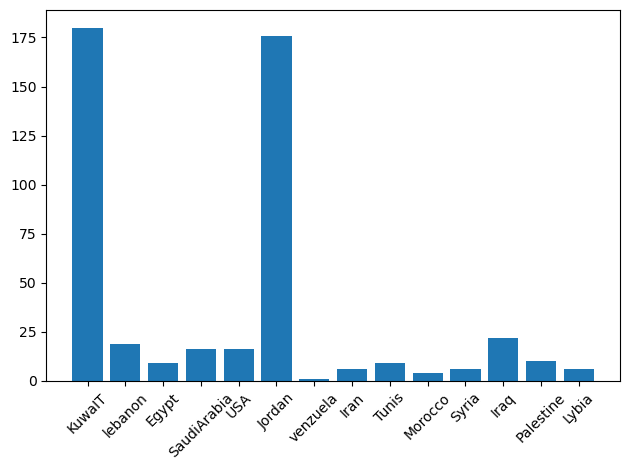

In [89]:
# 시각화
import matplotlib.pyplot as plt
countries = list(result.keys())
counts = list(result.values())
plt.bar(countries, counts)
plt.xticks(rotation=45)  # ← x축 레이블 45도 회전
plt.tight_layout()       # ← 겹침 방지 (여백 자동 조절)
plt.show()


# RDD 실습

In [67]:
from pyspark.sql import SparkSession
import json

In [72]:

spark = SparkSession.builder.appName('pyspark example1').getOrCreate()

countries = spark.sparkContext.parallelize(["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"])
countries.take(3)

['KuwaIT', 'lebanon', 'Jordan']

In [79]:
# 소문자 변환

countries_lower = countries.map(lambda x: x.lower())
countries_lower.take(3)

['kuwait', 'lebanon', 'jordan']

In [86]:
# jordan 추출
countries_lower.filter(lambda x: x == "jordan").collect()

['jordan', 'jordan', 'jordan']

In [88]:
# 몇개국인지 세어보기 : distinct()>count()
dd = countries_lower.distinct()
dd.count()

6

In [90]:
# 국가별 빈도수
data

['KuwaIT',
 'lebanon',
 'Jordan',
 'Jordan',
 'USA',
 'Egypt',
 'Jordan',
 'USA',
 'Iran',
 'Iran',
 'KuwaIT']

In [91]:
country_pairs = countries_lower.map(lambda x:(x,1))
country_pairs.take(1)

[('kuwait', 1)]

In [92]:
county_counts = country_pairs.reduceByKey(lambda a,b: a+b)
county_counts.take(2)

[('kuwait', 2), ('lebanon', 1)]

In [94]:
county_counts.take(6)

[('kuwait', 2),
 ('lebanon', 1),
 ('egypt', 1),
 ('jordan', 3),
 ('usa', 2),
 ('iran', 2)]

In [95]:
county_counts.collect()

[('kuwait', 2),
 ('lebanon', 1),
 ('egypt', 1),
 ('jordan', 3),
 ('usa', 2),
 ('iran', 2)]

In [96]:
# 정렬
county_counts.sortByKey().collect()

[('egypt', 1),
 ('iran', 2),
 ('jordan', 3),
 ('kuwait', 2),
 ('lebanon', 1),
 ('usa', 2)]

In [98]:
county_counts.sortBy(lambda x: x[1], ascending=False).collect()

[('jordan', 3),
 ('kuwait', 2),
 ('usa', 2),
 ('iran', 2),
 ('lebanon', 1),
 ('egypt', 1)]

In [107]:
from functools import reduce

lst = ["Kuwait", "lebanon", "Jordan", "USA"]
countries = reduce(lambda a, b: a + ',' + b, lst)
print(countries)


Kuwait,lebanon,Jordan,USA


In [ ]:
# 저장소에 저장

In [109]:
output_path = 'output/countries_result'

In [110]:
import shutil

In [112]:
if os.path.exists(output_path):
    shutil.rmtree(output_path)
countries_lower.saveAsTextFile(output_path)

In [ ]:
#mnm_dataset.csv를 읽어보기